# VAE_2D_Example

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn, optim

## Prepare Data

Text(0,0.5,'y1')

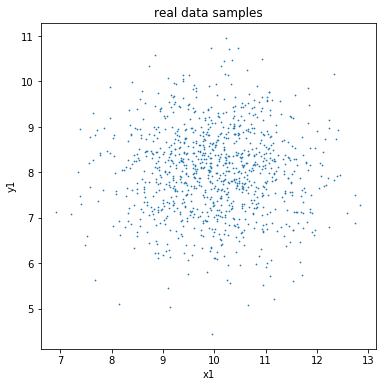

In [2]:
def sample_real(batch_size=100):
    x = torch.randn(batch_size, 2)   # x ~ N(mu=0,std=1)
    x[:,0] += 10
    x[:,1] += 8
    return x

plt.figure(figsize=[6,6])
x = sample_real(1000).numpy()
plt.scatter(x[:,0],x[:,1],0.5)
plt.title('real data samples')
plt.xlabel('x1')
plt.ylabel('y1')

## Define VAE model

In [3]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        # Build two layer net
        self.linear1 = nn.Sequential(nn.Linear(2,8),nn.ELU())
        self.linear_mu = nn.Linear(8,8)
        self.linear_std = nn.Linear(8,8)
        self._init_parameters()
        
    def forward(self, input):
        output = self.linear1(input)
        mu = self.linear_mu(output)
        std = self.linear_std(output)
        eps = torch.randn(mu.size())
        z = mu + std * eps     
        return z, mu, std
    
    def _init_parameters(self):
        for p in self.parameters():
            if p.ndimension()>1:
                nn.init.kaiming_normal_(p)

In [4]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.linear1 = nn.Sequential(nn.Linear(8,8),nn.ELU())
        self.linear2 = nn.Linear(8,2)
        self._init_parameters()
        
    def forward(self, input):
        output = self.linear1(input)
        output = self.linear2(output)
        return output
    
    def _init_parameters(self):
        for p in self.parameters():
            if p.ndimension()>1:
                nn.init.kaiming_normal_(p)

## Loss function
$E_{z~Q}[log_P{X|z}] + D_{KL}[{Q(z|x)}||{P(z)}]$.

- loss = reconstruction_loss + latent_loss

- reconstruction_loss = X_generated should equal X => MSE, Regression, or whatever
- latent_loss = drive $\mu$ and $\Sigma$ toward an Isotropic Gaussian => $\mu^2 +  tr \Sigma$

## Training VAE Model

In [5]:
# a helper function to plot results
def plot_decoder():
    plt.figure(figsize=[5,5])

    z = torch.randn(200,8)
    x_gen = decoder(z).data.numpy()
    plt.scatter(x_gen[:,0],x_gen[:,1],0.8)
    
    x_real = sample_real(200).numpy()
    plt.scatter(x_real[:,0],x_real[:,1],0.8)
    plt.legend(['VAE','Real Data'])
    
    plt.xlim([-1,11])
    plt.ylim([-1,11])
    return x_gen.mean(0), x_gen.std(0)

epoch=0, loss=13820.568359375


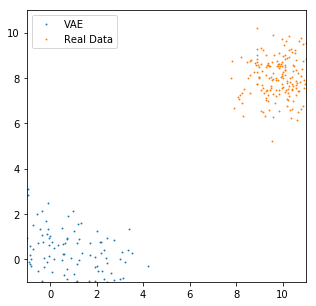

mean=[-0.54429364  0.5311438 ], std=[2.1321068 1.7024373]
epoch=1000, loss=3311.2177734375
epoch=2000, loss=852.2542724609375
epoch=3000, loss=294.4023742675781
epoch=4000, loss=238.99977111816406
epoch=5000, loss=193.717529296875
epoch=6000, loss=153.57052612304688
epoch=7000, loss=112.3112564086914
epoch=8000, loss=79.179443359375
epoch=9000, loss=54.546146392822266
epoch=10000, loss=35.05367660522461


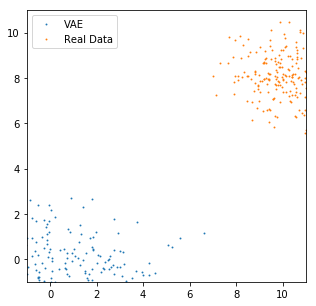

mean=[0.22141773 0.04847386], std=[2.234041  1.2132303]
epoch=11000, loss=22.23051643371582
epoch=12000, loss=12.447437286376953
epoch=13000, loss=7.725859642028809
epoch=14000, loss=5.525196075439453
epoch=15000, loss=4.417477607727051
epoch=16000, loss=4.247585296630859
epoch=17000, loss=3.4358363151550293
epoch=18000, loss=2.863325595855713
epoch=19000, loss=2.6058101654052734
epoch=20000, loss=2.4187705516815186


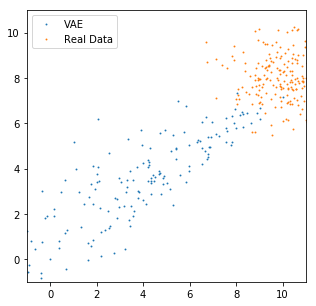

mean=[2.3582277 2.3959265], std=[4.1318808 2.92415  ]
epoch=21000, loss=2.0538763999938965
epoch=22000, loss=1.959315538406372
epoch=23000, loss=1.876157283782959
epoch=24000, loss=1.783428430557251
epoch=25000, loss=1.5896389484405518
epoch=26000, loss=1.770599126815796
epoch=27000, loss=1.6717212200164795
epoch=28000, loss=1.543626308441162
epoch=29000, loss=1.3111234903335571
epoch=30000, loss=1.404628038406372


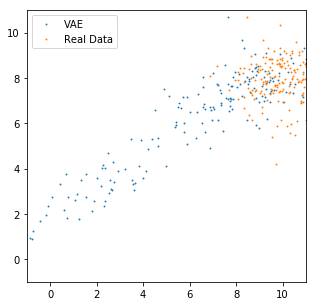

mean=[4.4689784 4.738733 ], std=[5.6882925 4.267723 ]
epoch=31000, loss=1.2993131875991821
epoch=32000, loss=1.1411011219024658
epoch=33000, loss=1.2038772106170654
epoch=34000, loss=1.3308966159820557
epoch=35000, loss=1.2425353527069092
epoch=36000, loss=1.1525728702545166
epoch=37000, loss=1.1430537700653076
epoch=38000, loss=1.2163207530975342
epoch=39000, loss=1.0085952281951904
epoch=40000, loss=1.1254940032958984


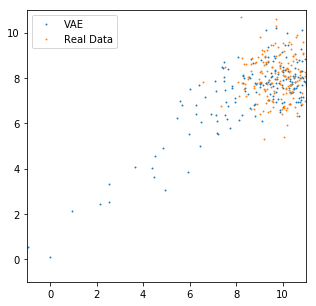

mean=[8.448424  7.0509925], std=[3.263946 2.249312]
epoch=41000, loss=1.0249741077423096
epoch=42000, loss=1.0054042339324951
epoch=43000, loss=1.004870891571045
epoch=44000, loss=1.0809687376022339
epoch=45000, loss=1.0718835592269897
epoch=46000, loss=1.0651386976242065
epoch=47000, loss=1.0086184740066528
epoch=48000, loss=0.9194742441177368
epoch=49000, loss=0.8641623258590698
epoch=50000, loss=0.9102898836135864


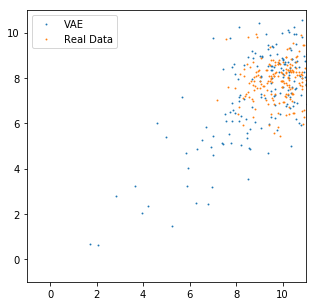

mean=[9.207468 7.333474], std=[2.3423913 2.3156633]
epoch=51000, loss=0.8871094584465027
epoch=52000, loss=0.9361138343811035
epoch=53000, loss=0.8407725095748901
epoch=54000, loss=0.7997714281082153
epoch=55000, loss=0.8984971046447754
epoch=56000, loss=0.8652634024620056
epoch=57000, loss=0.7950493097305298
epoch=58000, loss=0.8709758520126343
epoch=59000, loss=0.8351274132728577
epoch=60000, loss=0.8456113338470459


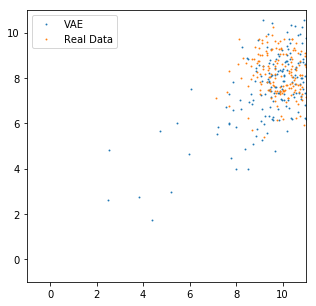

mean=[9.765675 7.742382], std=[1.6854335 1.7313143]
epoch=61000, loss=0.807774007320404
epoch=62000, loss=0.8221728801727295
epoch=63000, loss=0.809455156326294
epoch=64000, loss=0.8166952133178711
epoch=65000, loss=0.8006729483604431
epoch=66000, loss=0.8438644409179688
epoch=67000, loss=0.8202064037322998
epoch=68000, loss=0.7992856502532959
epoch=69000, loss=0.789118766784668
epoch=70000, loss=0.827324628829956


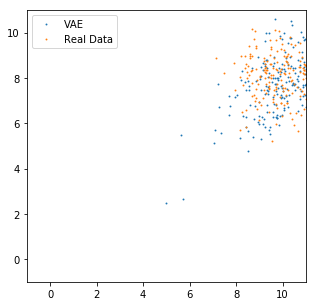

mean=[9.843106  7.6877217], std=[1.1706978 1.2958809]
epoch=71000, loss=0.7749990820884705
epoch=72000, loss=0.7597808241844177
epoch=73000, loss=0.8340487480163574
epoch=74000, loss=0.7840268611907959
epoch=75000, loss=0.7255802154541016
epoch=76000, loss=0.7505729794502258
epoch=77000, loss=0.7960978150367737
epoch=78000, loss=0.749362587928772
epoch=79000, loss=0.8086109757423401
epoch=80000, loss=0.8112976551055908


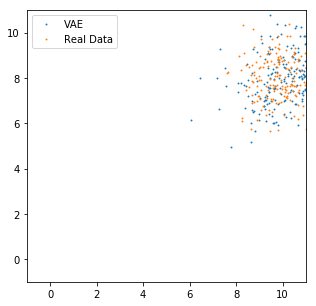

mean=[9.988172  7.9768715], std=[1.0710485 1.142549 ]
epoch=81000, loss=0.7761435508728027
epoch=82000, loss=0.7654398083686829
epoch=83000, loss=0.7738345265388489
epoch=84000, loss=0.7602995038032532
epoch=85000, loss=0.690623939037323
epoch=86000, loss=0.7444323301315308
epoch=87000, loss=0.7691446542739868
epoch=88000, loss=0.761756956577301
epoch=89000, loss=0.7200853228569031
epoch=90000, loss=0.7542735934257507


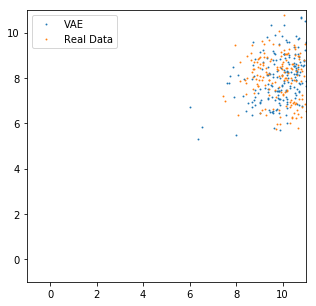

mean=[9.927845 8.010494], std=[0.93908423 1.0602746 ]
epoch=91000, loss=0.7580041885375977
epoch=92000, loss=0.7597445249557495
epoch=93000, loss=0.7732915878295898
epoch=94000, loss=0.7429922819137573
epoch=95000, loss=0.7746606469154358
epoch=96000, loss=0.7650665640830994
epoch=97000, loss=0.7619302272796631
epoch=98000, loss=0.7534041404724121
epoch=99000, loss=0.7303590774536133
epoch=100000, loss=0.733733057975769


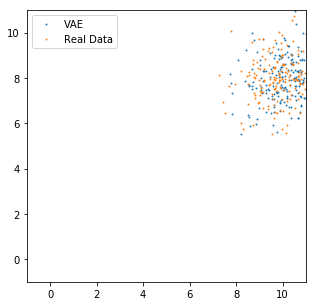

mean=[10.064695  7.982512], std=[0.86579597 1.0058602 ]


In [6]:
from itertools import chain
learning_rate = 0.0001
max_epoch = 100001
batch_size = 200

encoder = Encoder()
decoder = Decoder()
parameters = chain(encoder.parameters(), decoder.parameters())
optimizer = optim.Adam(parameters, lr=learning_rate)

for epoch in range(max_epoch):
    optimizer.zero_grad()
    
    x = sample_real(batch_size)
    z, mu, std = encoder(x)
    x_gen = decoder(z)
    
    loss_reconstruction = torch.mean((x_gen-x)**2)
    D_kl = 0.5 * torch.mean(mu**2 + std**2 - 1 - 2*torch.log(1e-10+torch.abs(std)))
    loss = loss_reconstruction + D_kl
    
    loss.backward()
    optimizer.step()
    
    if epoch%1000==0:
        print('epoch={}, loss={}'.format(epoch,loss.item()))
    if epoch%10000==0:
        mean, std = plot_decoder()
        plt.show()
        print('mean={}, std={}'.format(mean, std))
